In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
from tqdm import tqdm
from util import rationalize_real, reduce_rational_list

npos = 4095
ncascade = 3

ratlists = []
errors = []
for i in tqdm(xrange(npos)):
    rat = i / float(npos)
    ratlist = rationalize_real(rat, A=[0,1,2,3,5,7], B=[1,2,3,5,7], max_depth=ncascade)
    rat_approx = reduce_rational_list(ratlist)
    error = abs(rat - rat_approx)
    ratlists.append(ratlist)
    errors.append(error)

100%|██████████| 4095/4095 [05:40<00:00, 12.04it/s]


In [21]:
ratlists.append([(1, 1), (1, 1), (1, 1)])
errors.append(0.0)

In [27]:
import cPickle as pickle
with open('ratios.pkl', 'wb') as f:
    pickle.dump(ratlists, f)

In [33]:
flattened = []
for i in xrange(4096):
    for j in xrange(3):
        flattened.append(ratlists[i][j][0])
        flattened.append(ratlists[i][j][1])

In [41]:
groups = [flattened[i * 6:(i + 1) * 6] for i in xrange(4096)]
print '\n'.join([', '.join([str(x) for x in group]) for group in groups])

0, 1, 0, 1, 0, 1
0, 1, 0, 1, 0, 1
0, 1, 0, 1, 0, 1
0, 1, 0, 1, 0, 1
0, 1, 0, 1, 0, 1
0, 1, 0, 1, 0, 1
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 5
1, 7, 1, 7, 1, 5
1, 7, 1, 7, 1, 5
1, 7, 1, 7, 1, 5
1, 7, 1, 7, 1, 5
1, 7, 1, 7, 1, 5
1, 7, 1, 5, 1, 5
1, 7, 1, 5, 1, 5
1, 7, 1, 5, 1, 5
2, 7, 1, 7, 1, 7
2, 7, 1, 7, 1, 7
1, 7, 1, 7, 1, 3
1, 7, 1, 7, 1, 3
1, 7, 1, 7, 1, 3
1, 7, 1, 7, 1, 3
1, 7, 1, 7, 1, 3
1, 5, 1, 5, 1, 5
1, 5, 1, 5, 1, 5
1, 5, 1, 5, 1, 5
2, 7, 1, 7, 1, 5
3, 7, 1, 7, 1, 7
3, 7, 1, 7, 1, 7
3, 7, 1, 7, 1, 7
1, 7, 1, 5, 1, 3
1, 7, 1, 3, 1, 5
1, 7, 1, 3, 1, 5
1, 7, 1, 7, 1, 2
1, 7, 1, 7, 1, 2
1, 7, 1, 7, 1, 2
1, 7, 1, 7, 1, 2
2, 7, 1, 5, 1, 5
2, 7, 1, 5, 1, 5
2, 5, 1, 5, 1, 7
2, 7, 2, 7, 1, 7
3, 5, 1, 7, 1, 7
3, 5, 1, 7, 1, 7
3, 7, 1, 7, 1, 5
3, 7, 1, 7, 1, 5
1, 5, 1, 3, 1, 5
1, 5, 1, 3, 1, 5
1, 5, 1, 5, 1, 3
2, 7, 1, 7, 1, 3
2, 7, 1, 7, 1, 3
1, 7, 1, 5, 1,

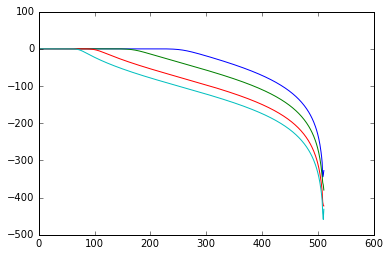

In [58]:
from scipy.signal import iirfilter, freqz

norder = 8
filters = []

for i in [2, 3, 5, 7]:
    f = iirfilter(norder, 1.0 / i, btype='low', ftype='butter')
    filters.append(f)
    w, h = freqz(*f)
    plt.plot(20 * np.log10(np.abs(h) / 1.0))

In [62]:
print 'b'
for filter in filters:
    print ', '.join([str(x) for x in filter[0]])

print 'a'
for filter in filters:
    print ', '.join([str(x) for x in filter[1]])

b
0.00926728558409, 0.0741382846727, 0.259483996354, 0.518967992709, 0.648709990886, 0.518967992709, 0.259483996354, 0.0741382846727, 0.00926728558409
0.000709239652865, 0.00567391722292, 0.0198587102802, 0.0397174205605, 0.0496467757006, 0.0397174205605, 0.0198587102802, 0.00567391722292, 0.000709239652865
2.39596441038e-05, 0.00019167715283, 0.000670870034906, 0.00134174006981, 0.00167717508726, 0.00134174006981, 0.000670870034906, 0.00019167715283, 2.39596441038e-05
2.302104857e-06, 1.8416838856e-05, 6.44589359961e-05, 0.000128917871992, 0.00016114733999, 0.000128917871992, 6.44589359961e-05, 1.8416838856e-05, 2.302104857e-06
a
1.0, -7.21644966006e-16, 1.06093559916, -5.49265243674e-16, 0.290888157274, -9.6356392849e-17, 0.0204295879259, -2.97671538584e-18, 0.000171765164194
1.0, -2.65271352838, 3.91485713988, -3.60883450621, 2.25967290022, -0.957025076602, 0.266348533326, -0.0440409341543, 0.00330082304866
1.0, -4.784514895, 10.4450410655, -13.4577198902, 11.1293310392, -6.02526039